In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 

import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('Market+Risk+Dataset.csv')

In [27]:
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [28]:
df.columns = df.columns.str.replace(' ', '_')

In [29]:
df.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [30]:
df.tail()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [31]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [33]:
df['Date'] = [pd.to_datetime(d) for d in df['Date']]

In [34]:
df.dtypes.value_counts()

int64             10
datetime64[ns]     1
dtype: int64

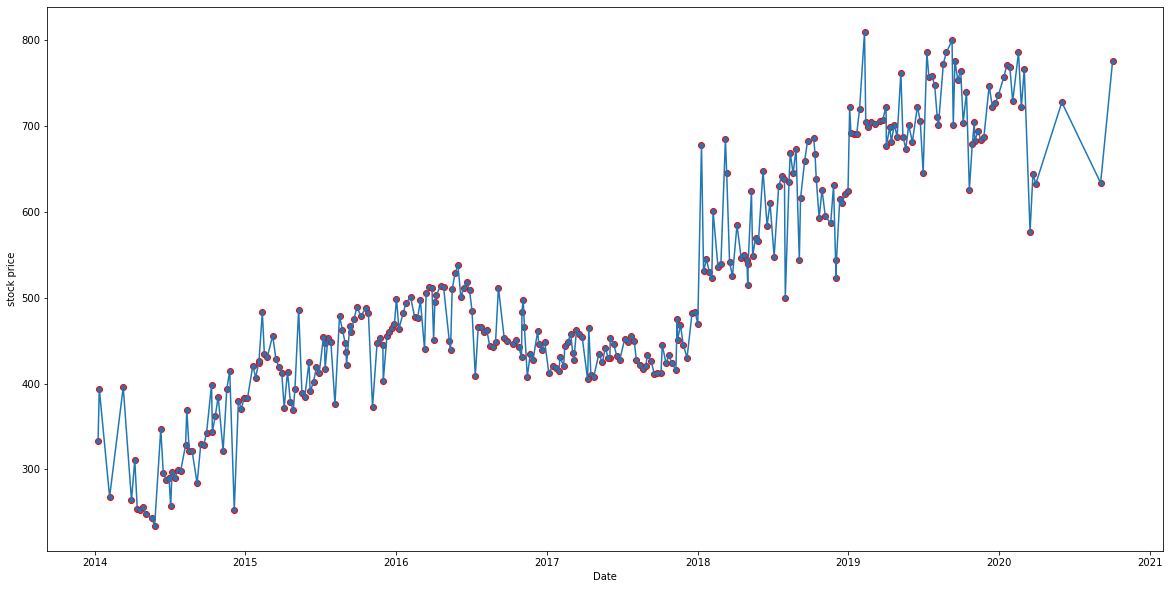

In [35]:
plt.figure(figsize=(20,10))
plt.scatter(df['Date'], df['Infosys'], edgecolors='r')
sns.lineplot(data = df, x = 'Date', y = 'Infosys')
plt.xlabel("Date")
plt.ylabel("stock price")
plt.show()

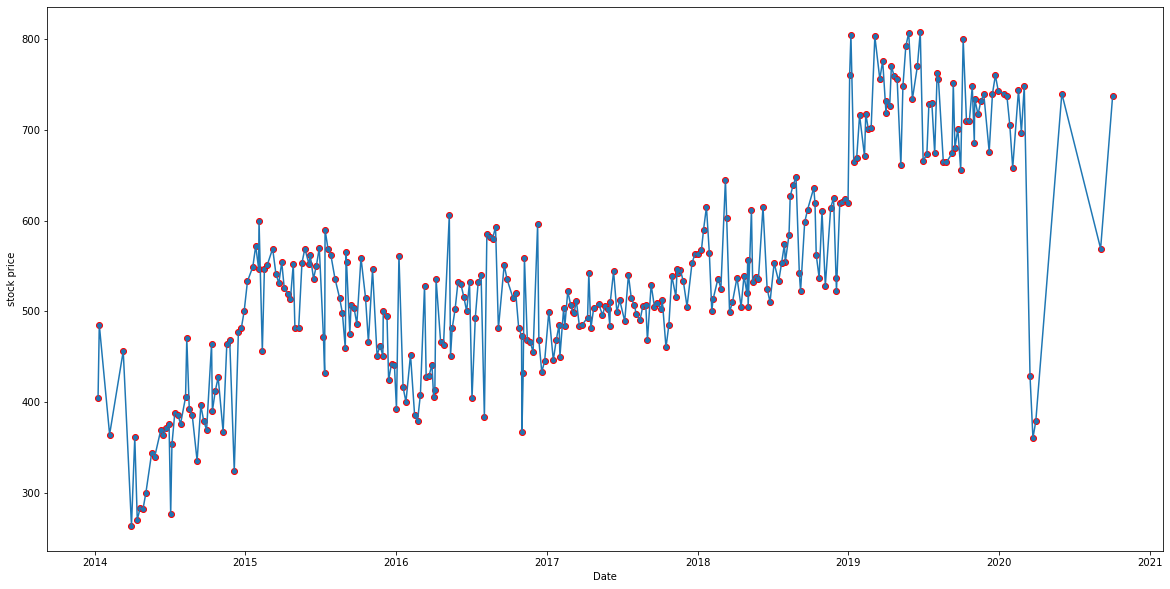

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(df['Date'], df['Axis_Bank'], edgecolors='r')
sns.lineplot(data = df, x = 'Date', y = 'Axis_Bank')
plt.xlabel("Date")
plt.ylabel("stock price")
plt.show()

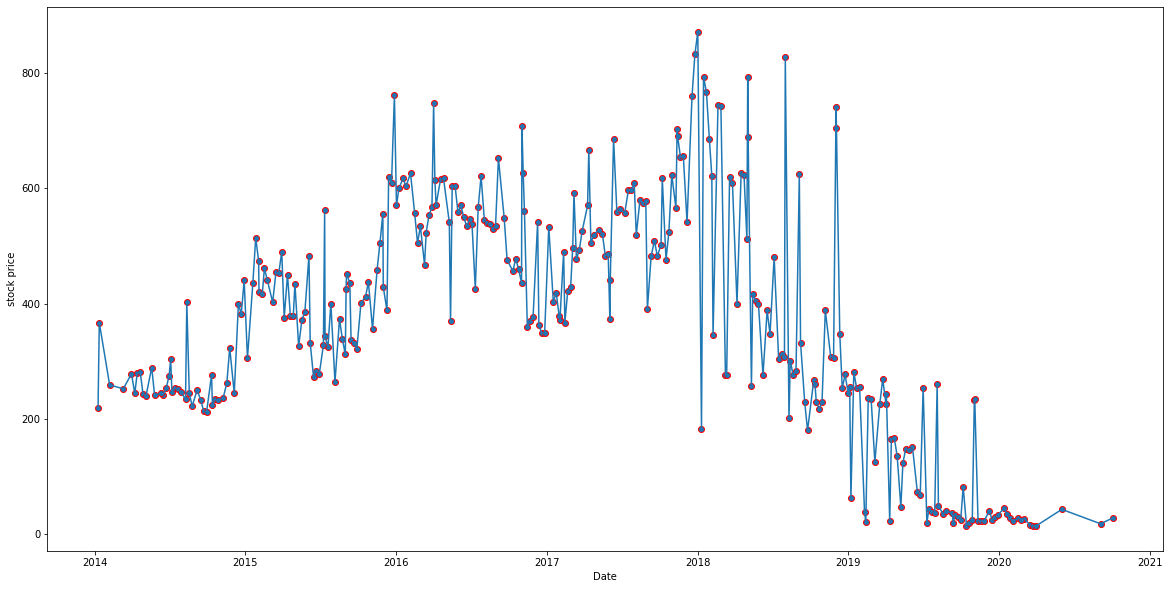

In [37]:
plt.figure(figsize=(20,10))
plt.scatter(df['Date'], df['Jet_Airways'], edgecolors='r')
sns.lineplot(data = df, x = 'Date', y = 'Jet_Airways')
plt.xlabel("Date")
plt.ylabel("stock price")
plt.show()

In [38]:
stock_returns = np.log(df.drop('Date',axis=1)).diff(axis = 0, periods = 1)

In [39]:
stock_returns.shape

(314, 10)

In [40]:
stock_returns

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


In [41]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

In [42]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

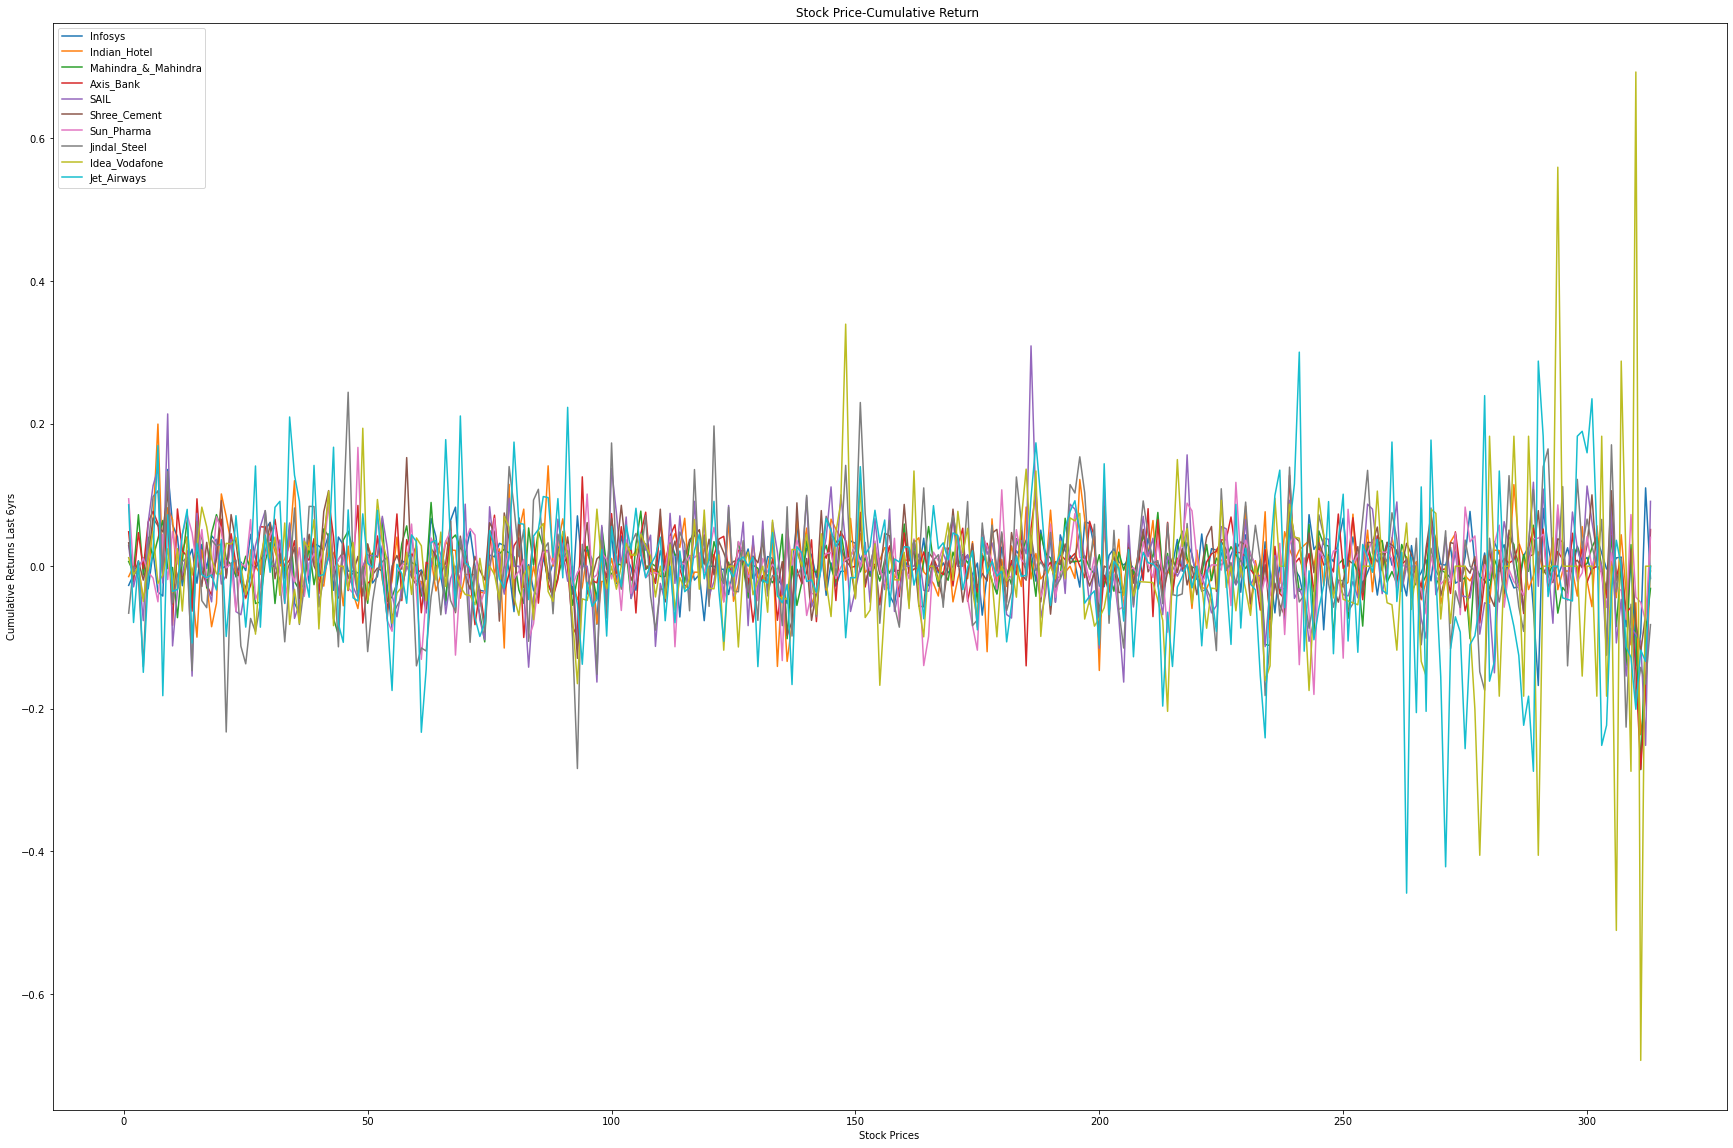

In [43]:
stock_returns.plot(figsize=(30,20)) 
plt.xlabel("Stock Prices") 
plt.ylabel("Cumulative Returns Last 6yrs") 
plt.title("Stock Price-Cumulative Return ")
plt.show()

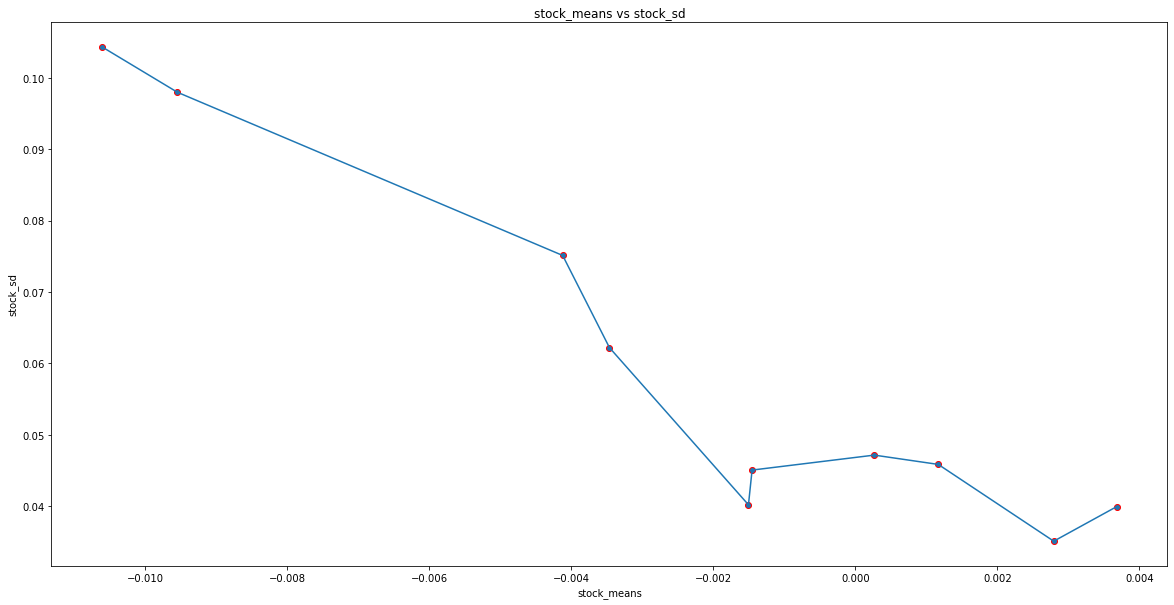

In [44]:
plt.figure(figsize=(20,10))
plt.scatter(stock_means, stock_sd, edgecolors='r')
sns.lineplot(data = df, x = stock_means, y = stock_sd)
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()

In [45]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.sort_values(by=['Average'],ascending=False)

,Average,Volatility
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
Sun_Pharma,-0.001455,0.045033
Mahindra_&_Mahindra,-0.001506,0.040169
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315


In [46]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd}) 
df.sort_values(by=['Volatility'],ascending=False)

,Average,Volatility
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972
Jindal_Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Indian_Hotel,0.000266,0.047131
Axis_Bank,0.001167,0.045828
Sun_Pharma,-0.001455,0.045033
Mahindra_&_Mahindra,-0.001506,0.040169
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070
